<a href="https://colab.research.google.com/github/Kiruthika-KB/Final-Project/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
import nltk

In [2]:
# dataset loading
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data = pd.read_csv('twitter_data.csv', encoding='ISO-8859-1', on_bad_lines='skip', quoting=3)
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'source', 'text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#data Preprocessing
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

data['cleaned_text'] = data['text'].apply(clean_text)

In [4]:
data.shape

(1909, 8)

In [5]:
data.head(3)

,target,ids,date,flag,user,source,text,cleaned_text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,NaN,nan
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,NaN,nan
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,NaN,nan


In [6]:
# feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text']).toarray()
y = data['target']

In [7]:
#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [12]:
model = KNeighborsClassifier(n_neighbors=250, weights='distance')
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=250, weights='distance')

In [13]:
# model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 55.76%


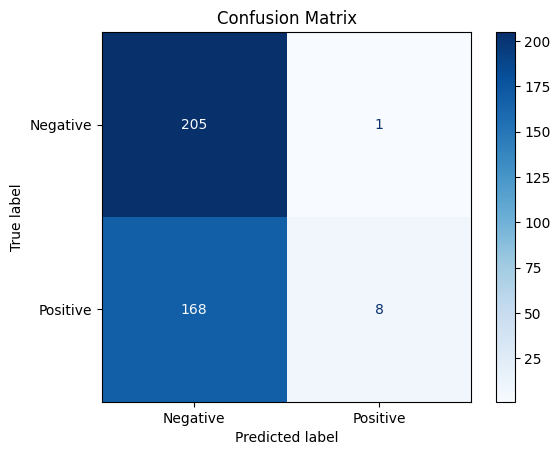

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()
